# **K-Nearest Neighbor**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np

data = load_wine()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 42, test_size = 0.2)

## Normalization:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

**For k = 1:**

In [ ]:
predicted_labels1 = []
true_labels = y_test
k1 = 1
labels_list1 = []
for vec in X_test:
  prediction1, labels1 = Classification(X_train, vec, y_train, k1)
  predicted_labels1.append(prediction1)
  labels_list1.append(labels1)

print('true labels:\t  ', true_labels)
predicted_Labels1 = str(predicted_labels1)
print('predicted labels: ', predicted_Labels1.replace(',', ''))

Accuracy(true_labels, predicted_labels1, k1)
Confusion_Matrix(true_labels, predicted_labels1)

true labels:	   [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
predicted labels:  [0 0 2 1 1 0 1 2 1 1 1 2 1 1 0 1 1 1 0 1 0 1 0 2 2 2 1 1 1 0 1 1 2 0 1 0]
The accuracy of classifier for k = 1 is: 0.8055555555555556
Confusion Matrix:
Predicted  0   1  2
Actual             
0          9   5  0
1          1  13  0
2          0   1  7


**For k = 5:**

In [ ]:
predicted_labels2 = []
true_labels = y_test
k2 = 5
labels_list2 = []
for vec in X_test:
  prediction2, labels2 = Classification(X_train, vec, y_train, k2)
  predicted_labels2.append(prediction2)
  labels_list2.append(labels2)

print('true labels:\t  ', true_labels)
predicted_Labels2 = str(predicted_labels2)
print('predicted labels: ', predicted_Labels2.replace(',', ''))

Accuracy(true_labels, predicted_labels2, k2)
Confusion_Matrix(true_labels, predicted_labels2)

true labels:	   [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
predicted labels:  [0 0 1 1 1 0 1 2 1 1 1 2 1 1 0 1 1 1 0 1 0 1 1 2 1 2 1 1 1 0 1 1 2 1 1 0]
The accuracy of classifier for k = 5 is: 0.75
Confusion Matrix:
Predicted  0   1  2
Actual             
0          8   6  0
1          0  14  0
2          0   3  5


**For k = 10:**

In [ ]:
predicted_labels3 = []
true_labels = y_test
k3 = 10
labels_list3 = []
for vec in X_test:
  prediction3, labels3 = Classification(X_train, vec, y_train, k3)
  predicted_labels3.append(prediction3)
  labels_list3.append(labels3)

print('true labels:\t  ', true_labels)
predicted_Labels3 = str(predicted_labels3)
print('predicted labels: ', predicted_Labels3.replace(',', ''))

Accuracy(true_labels, predicted_labels3, k3)
Confusion_Matrix(true_labels, predicted_labels3)

true labels:	   [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
predicted labels:  [0 0 1 1 1 0 1 2 1 1 1 2 1 1 0 1 1 1 0 1 0 1 0 2 1 2 1 1 1 0 1 1 1 0 1 0]
The accuracy of classifier for k = 10 is: 0.7222222222222222
Confusion Matrix:
Predicted  0   1  2
Actual             
0          9   5  0
1          1  13  0
2          0   4  4


**For k = 20:**

In [ ]:
predicted_labels4 = []
true_labels = y_test
k4 = 20
labels_list4 = []
for vec in X_test:
  prediction4, labels4 = Classification(X_train, vec, y_train, k4)
  predicted_labels4.append(prediction4)
  labels_list4.append(labels4)

print('true labels:\t  ', true_labels)
predicted_Labels4 = str(predicted_labels4)
print('predicted labels: ', predicted_Labels4.replace(',', ''))

Accuracy(true_labels, predicted_labels4, k4)
Confusion_Matrix(true_labels, predicted_labels4)


true labels:	   [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
predicted labels:  [0 0 1 1 1 0 1 2 1 1 1 2 1 1 0 1 1 1 1 1 0 1 0 2 1 1 1 1 1 0 1 1 1 0 1 0]
The accuracy of classifier for k = 20 is: 0.6666666666666666
Confusion Matrix:
Predicted  0   1  2
Actual             
0          8   6  0
1          1  13  0
2          0   5  3


In [ ]:
## A function for Euclidean distance calculation:
def Euclidean_Distance(vec1, vec2):
  distance = 0
  for i in range(len(vec1)-1):
    distance += (vec1[i] - vec2[i])**2
  return sqrt(distance)

## -----------------------------------------------------------------------------
## A function for finding k nearest neighbors:
def Neighbors(train, test_vec, train_labels, k):
  distance = []
  data = []
  for i in train:
    d = Euclidean_Distance(test_vec, i)
    distance.append(d)
    data.append(i)
  
  distance = np.array(distance)
  data = np.array(data)
  index_dist = np.argsort(distance)       ## argsort returns the indexes of the ascending sorted list 
  data = data[index_dist]                 ## sorting the vectors by their distance 

  train_labels = train_labels[index_dist]   ## Sorting the labels by the distances
  neighbors = data[:k]                    ## choosing the k-closest vectors 
  labels = train_labels[:k]                ## choosing the labels of k nearest vectors
  return neighbors, labels
  
## -----------------------------------------------------------------------------
## A function for predicting the class of data:
def Classification(train, test_vec, train_labels, k):
  neighbors, labels = Neighbors(train, test_vec, train_labels, k)
  classes = list(labels)
  prediction = max(classes, key= classes.count)
  return prediction, labels

## -----------------------------------------------------------------------------
## A function for accuracy calculation:
def Accuracy(true_labels, predicted_labels, k):
  count = 0
  for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
      count += 1
  accuracy = count/len(true_labels)
  print("The accuracy of classifier for k = {} is: {}".format(k , accuracy))

## -----------------------------------------------------------------------------
## A function for creating confusion matrix:
def Confusion_Matrix(true_labels, predicted_labels):
  import pandas as pd
  label_actu = pd.Series(true_labels, name='Actual')
  label_pred = pd.Series(predicted_labels, name='Predicted')
  confusion_matrix = pd.crosstab(label_actu, label_pred)
  print('Confusion Matrix:')
  print(confusion_matrix)


# **Probability Distribution of classes**

true
{1.0: 29}
false
{1.0: 7}


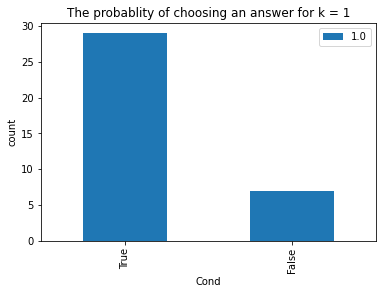

In [ ]:
## For k = 1
belonging_prob(true_labels, predicted_labels1, labels_list1, k1)

true
{1.0: 12, 0.8: 13, 0.6: 2}
false
{0.6: 5, 1.0: 4}


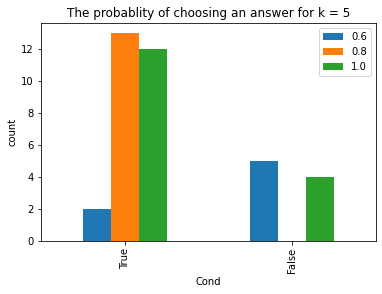

In [ ]:
## For k = 5
belonging_prob(true_labels, predicted_labels2, labels_list2, k2)

true
{0.8: 9, 0.9: 8, 1.0: 5, 0.5: 1, 0.6: 2, 0.7: 1}
false
{0.7: 3, 0.6: 1, 0.8: 2, 1.0: 3, 0.5: 1}


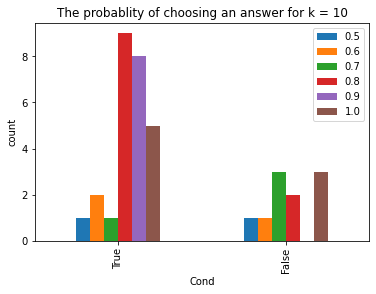

In [ ]:
## For k = 10
belonging_prob(true_labels, predicted_labels3, labels_list3, k3)

true
{0.8: 1, 0.6: 3, 0.9: 9, 0.65: 3, 0.95: 2, 0.5: 2, 0.7: 1, 0.75: 1, 0.45: 1, 0.55: 1}
false
{0.7: 3, 0.85: 1, 1.0: 3, 0.6: 3, 0.75: 2}


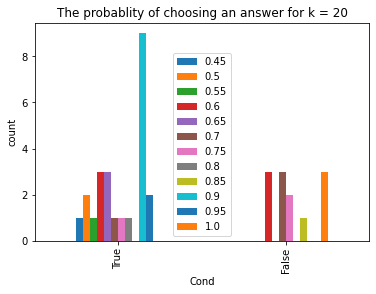

In [ ]:
## For k = 20
belonging_prob(true_labels, predicted_labels4, labels_list4, k4)

In [ ]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd

def belonging_prob(true_labels, predicted_labels, k_labels, k):
  true_dict = {}
  false_dict = {}
  for i in range(len(true_labels)):
    # true detection
    if true_labels[i] == predicted_labels[i]:  
      count = 0
      for j in range(k):
        if k_labels[i][j] == true_labels[i]:
          count += 1

      prob = count/k
      if prob not in true_dict:
            true_dict[prob] = 1
      else:
            true_dict[prob] += 1

    # false detection
    elif true_labels[i] != predicted_labels[i]:  
      count = 0
      for j in range(k):
        if k_labels[i][j] != true_labels[i]:
          count += 1

      prob = count/k
      if prob not in false_dict:
            false_dict[prob] = 1
      else:
            false_dict[prob] += 1

  print('true')
  print(true_dict)
  print('false')
  print(false_dict)


  # Make the length of dictionaries the same as each other
  true_keys = list(true_dict.keys())
  for j in range(len(true_dict)):    
    if true_keys[j] not in false_dict:
      false_dict[true_keys[j]] = 0

  false_keys = list(false_dict.keys())
  for j in range(len(false_dict)):    
    if false_keys[j] not in true_dict:
      true_dict[false_keys[j]] = 0


  true_dict = OrderedDict(sorted(true_dict.items()))
  true_dict = dict(true_dict)
  false_dict = OrderedDict(sorted(false_dict.items()))
  false_dict = dict(false_dict)

  T = ['True']
  F = ['False']
  Columns = ['Cond']
  true = list(true_dict.values())
  false = list(false_dict.values())
  probs = list(true_dict.keys())

  for i in range(len(true)):
    T.append(true[i])
    F.append(false[i])
    Columns.append(str(probs[i]))

  # plotting the bar chart:
  df = pd.DataFrame([T,F], columns = Columns)
  df.plot(x = 'Cond', kind = 'bar', stacked = False, title = 'The probablity of choosing an answer for k = {}'.format(k))
  plt.ylabel('count')

# **Metric Learning**
## **Plotting the transformed data in new space**
### **LMNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# !pip install metric_learn
from sklearn.model_selection import train_test_split
from metric_learn import LMNN
from sklearn.datasets import load_wine

data = load_wine()

X = data['data']
Y = data['target']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 


**Original Data:**

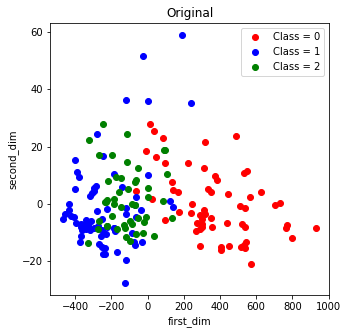

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_trans = pca.transform(X)

# Plotting:
x_class0 = []
y_class0 = []
x_class1 = []
y_class1 = []
x_class2 = []
y_class2 = []
  
for r in range(len(X_trans)):
  if Y[r] == 0:  # data for class = 0
    x_class0.append(X_trans[r][0])
    y_class0.append(X_trans[r][1])
  elif Y[r] == 1:  # data for class = 1
    x_class1.append(X_trans[r][0])
    y_class1.append(X_trans[r][1])
  elif Y[r] == 2:  # data for class = 2
    x_class2.append(X_trans[r][0])
    y_class2.append(X_trans[r][1])

plt.figure(figsize=(5, 5))
plt.scatter(x_class0, y_class0, marker = 'o', color = 'red')
plt.scatter(x_class1, y_class1, marker = 'o', color = 'blue')
plt.scatter(x_class2, y_class2, marker = 'o', color = 'green')
plt.xlabel('first_dim')
plt.ylabel('second_dim')
plt.legend(["Class = 0" , "Class = 1" , "Class = 2"])
plt.title("Original")
plt.show()

**Transformed Data:**

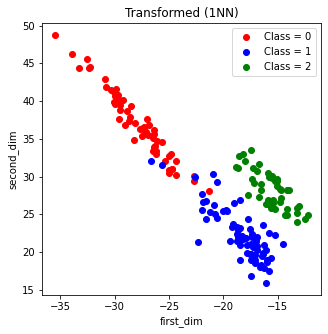

In [ ]:
# for k = 1
k1 = 1
LMNN_Func(k1, X, Y, 'Transformed (1NN)')

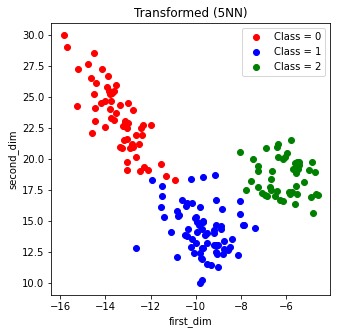

In [ ]:
# for k = 5
k2 = 5
LMNN_Func(k2, X, Y, 'Transformed (5NN)')

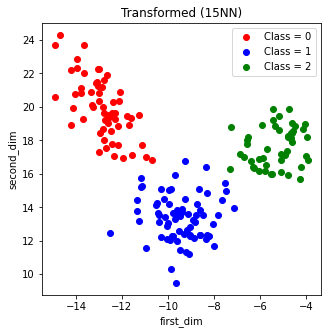

In [ ]:
# for k = 15
k3 = 15
LMNN_Func(k3, X, Y, 'Transformed (15NN)')

In [ ]:
def LMNN_Func(k_, X, Y, title):
  lmnn = LMNN(k = k_, learn_rate = 1e-6, n_components = 2)
  lmnn.fit(X, Y)
  X_trans = lmnn.transform(X)

  # Plotting:
  x_class0 = []
  y_class0 = []
  x_class1 = []
  y_class1 = []
  x_class2 = []
  y_class2 = []
  
  for r in range(len(X_trans)):
    if Y[r] == 0:  # data for class = 0
      x_class0.append(X_trans[r][0])
      y_class0.append(X_trans[r][1])
    elif Y[r] == 1:  # data for class = 1
      x_class1.append(X_trans[r][0])
      y_class1.append(X_trans[r][1])
    elif Y[r] == 2:  # data for class = 2
      x_class2.append(X_trans[r][0])
      y_class2.append(X_trans[r][1])

  plt.figure(figsize=(5, 5))
  plt.scatter(x_class0, y_class0, marker = 'o', color = 'red')
  plt.scatter(x_class1, y_class1, marker = 'o', color = 'blue')
  plt.scatter(x_class2, y_class2, marker = 'o', color = 'green')
  plt.xlabel('first_dim')
  plt.ylabel('second_dim')
  plt.legend(["Class = 0" , "Class = 1" , "Class = 2"])
  plt.title("{}".format(title))
  plt.show()

### **LFDA**
**Original Data:**

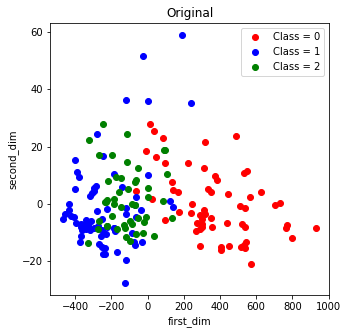

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_trans = pca.transform(X)

# Plotting:
x_class0 = []
y_class0 = []
x_class1 = []
y_class1 = []
x_class2 = []
y_class2 = []
  
for r in range(len(X_trans)):
  if Y[r] == 0:  # data for class = 0
    x_class0.append(X_trans[r][0])
    y_class0.append(X_trans[r][1])
  elif Y[r] == 1:  # data for class = 1
    x_class1.append(X_trans[r][0])
    y_class1.append(X_trans[r][1])
  elif Y[r] == 2:  # data for class = 2
    x_class2.append(X_trans[r][0])
    y_class2.append(X_trans[r][1])

plt.figure(figsize=(5, 5))
plt.scatter(x_class0, y_class0, marker = 'o', color = 'red')
plt.scatter(x_class1, y_class1, marker = 'o', color = 'blue')
plt.scatter(x_class2, y_class2, marker = 'o', color = 'green')
plt.xlabel('first_dim')
plt.ylabel('second_dim')
plt.legend(["Class = 0" , "Class = 1" , "Class = 2"])
plt.title("Original")
plt.show()

**Transformed Data:**

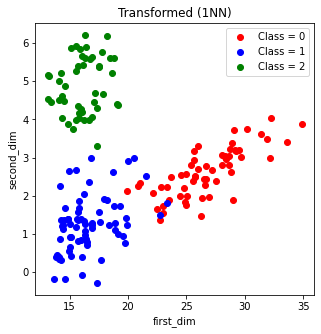

In [ ]:
# for k = 1
k1 = 1
LFDA_Func(k1, X, Y, 'Transformed (1NN)')

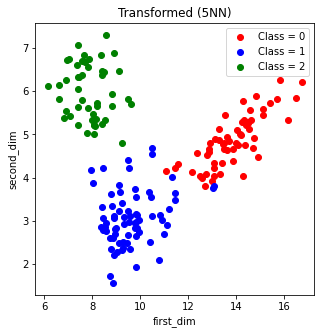

In [ ]:
# for k = 5
k2 = 5
LFDA_Func(k2, X, Y, 'Transformed (5NN)')

/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'


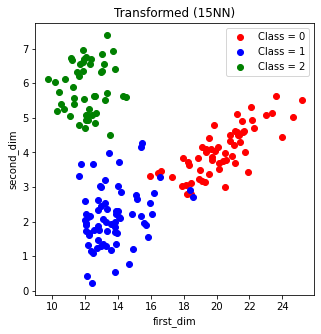

In [ ]:
# for k = 15
k3 = 15
LFDA_Func(k3, X, Y, 'Transformed (15NN)')

In [ ]:
from metric_learn import LFDA
import matplotlib.pyplot as plt
def LFDA_Func(k_, X, Y, title):
  lfda = LFDA(k = k_, n_components = 2)
  lfda.fit(X, Y)
  X_trans = lfda.transform(X)

  # Plotting:
  x_class0 = []
  y_class0 = []
  x_class1 = []
  y_class1 = []
  x_class2 = []
  y_class2 = []
  
  for r in range(len(X_trans)):
    if Y[r] == 0:  # data for class = 0
      x_class0.append(X_trans[r][0])
      y_class0.append(X_trans[r][1])
    elif Y[r] == 1:  # data for class = 1
      x_class1.append(X_trans[r][0])
      y_class1.append(X_trans[r][1])
    elif Y[r] == 2:  # data for class = 2
      x_class2.append(X_trans[r][0])
      y_class2.append(X_trans[r][1])

  plt.figure(figsize=(5, 5))
  plt.scatter(x_class0, y_class0, marker = 'o', color = 'red')
  plt.scatter(x_class1, y_class1, marker = 'o', color = 'blue')
  plt.scatter(x_class2, y_class2, marker = 'o', color = 'green')
  plt.xlabel('first_dim')
  plt.ylabel('second_dim')
  plt.legend(["Class = 0" , "Class = 1" , "Class = 2"])
  plt.title("{}".format(title))
  plt.show()

# **Comparing Classifiers' Functionality**
### **LMNN**

In [ ]:
# Best k: 15
# For k = 1
k_ = 15
k1 = 1
lmnn = LMNN(k = k_, learn_rate = 1e-6)
lmnn.fit(X, Y)
X_trans = lmnn.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LMNN_pred_labels = []
for vec in X_test:
  LMNN_pred, LMNN_labels = Classification(X_train, vec, y_train, k1)
  LMNN_pred_labels.append(LMNN_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LMNN_pred_labels, k1)
Confusion_Matrix(y_test, LMNN_pred_labels)

The accuracy of classifier for k = 1 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


In [ ]:
# For k = 5
k2 = 5
lmnn = LMNN(k = k_, learn_rate = 1e-6)
lmnn.fit(X, Y)
X_trans = lmnn.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LMNN_pred_labels = []
for vec in X_test:
  LMNN_pred, LMNN_labels = Classification(X_train, vec, y_train, k2)
  LMNN_pred_labels.append(LMNN_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LMNN_pred_labels, k2)
Confusion_Matrix(y_test, LMNN_pred_labels)

The accuracy of classifier for k = 5 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


In [ ]:
# For k = 10
k3 = 10
lmnn = LMNN(k = k_, learn_rate = 1e-6)
lmnn.fit(X, Y)
X_trans = lmnn.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LMNN_pred_labels = []
for vec in X_test:
  LMNN_pred, LMNN_labels = Classification(X_train, vec, y_train, k3)
  LMNN_pred_labels.append(LMNN_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LMNN_pred_labels, k3)
Confusion_Matrix(y_test, LMNN_pred_labels)

The accuracy of classifier for k = 10 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


In [ ]:
# For k = 20
k4 = 20
lmnn = LMNN(k = k_, learn_rate = 1e-6)
lmnn.fit(X, Y)
X_trans = lmnn.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LMNN_pred_labels = []
for vec in X_test:
  LMNN_pred, LMNN_labels = Classification(X_train, vec, y_train, k4)
  LMNN_pred_labels.append(LMNN_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LMNN_pred_labels, k4)
Confusion_Matrix(y_test, LMNN_pred_labels)

The accuracy of classifier for k = 20 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


### **LFDA**

In [ ]:
# Best k: 15
# For k = 1
k_ = 15
k1 = 1
lfda = LFDA(k = k_)
lfda.fit(X, Y)
X_trans = lfda.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LFDA_pred_labels = []
for vec in X_test:
  LFDA_pred, LFDA_labels = Classification(X_train, vec, y_train, k1)
  LFDA_pred_labels.append(LFDA_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LFDA_pred_labels, k1)
Confusion_Matrix(y_test, LFDA_pred_labels)

The accuracy of classifier for k = 1 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [ ]:
# For k = 5
k2 = 5
lfda = LFDA(k = k_)
lfda.fit(X, Y)
X_trans = lfda.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LFDA_pred_labels = []
for vec in X_test:
  LFDA_pred, LFDA_labels = Classification(X_train, vec, y_train, k2)
  LFDA_pred_labels.append(LFDA_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LFDA_pred_labels, k2)
Confusion_Matrix(y_test, LFDA_pred_labels)

The accuracy of classifier for k = 5 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [ ]:
# For k = 10
k3 = 10
lfda = LFDA(k = k_)
lfda.fit(X, Y)
X_trans = lfda.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LFDA_pred_labels = []
for vec in X_test:
  LFDA_pred, LFDA_labels = Classification(X_train, vec, y_train, k3)
  LFDA_pred_labels.append(LFDA_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LFDA_pred_labels, k3)
Confusion_Matrix(y_test, LFDA_pred_labels)

The accuracy of classifier for k = 10 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [ ]:
# For k = 5
k4 = 20
lfda = LFDA(k = k_)
lfda.fit(X, Y)
X_trans = lfda.transform(X)

# KNN:
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, random_state = 42, test_size = 0.2)
LFDA_pred_labels = []
for vec in X_test:
  LFDA_pred, LFDA_labels = Classification(X_train, vec, y_train, k4)
  LFDA_pred_labels.append(LFDA_pred)

# Accuracy and Confusion Matrix:
Accuracy(y_test, LFDA_pred_labels, k4)
Confusion_Matrix(y_test, LFDA_pred_labels)

The accuracy of classifier for k = 20 is: 1.0
Confusion Matrix:
Predicted   0   1  2
Actual              
0          14   0  0
1           0  14  0
2           0   0  8


/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [ ]:
def Accuracy(true_labels, predicted_labels, k):
  count = 0
  for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
      count += 1
  accuracy = count/len(true_labels)
  print("The accuracy of classifier for k = {} is: {}".format(k , accuracy))

def Confusion_Matrix(true_labels, predicted_labels):
  import pandas as pd
  label_actu = pd.Series(true_labels, name='Actual')
  label_pred = pd.Series(predicted_labels, name='Predicted')
  confusion_matrix = pd.crosstab(label_actu, label_pred)
  print('Confusion Matrix:')
  print(confusion_matrix)

# **Correlation Coefficient**
**Original:**

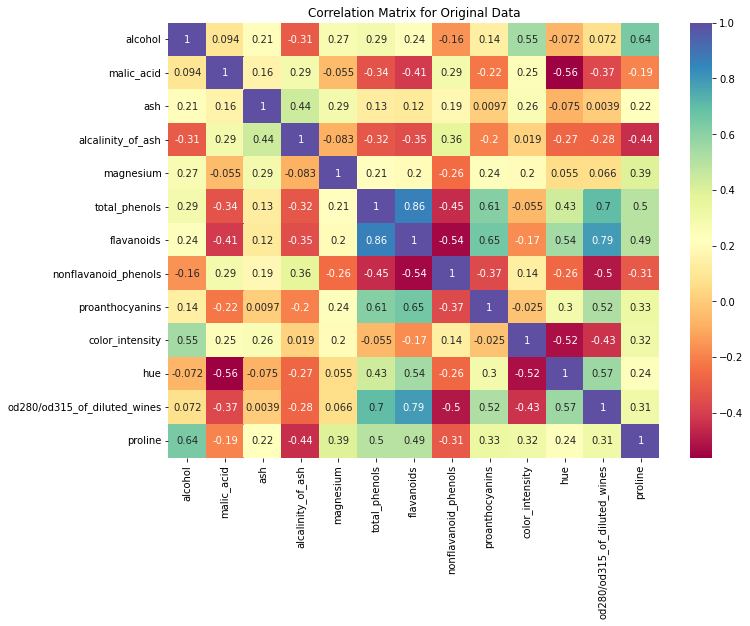

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(data=data.data, columns=data.feature_names)
corr_matrix = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr_matrix, cmap = 'Spectral', annot = True)
plt.title('Correlation Matrix for Original Data')
plt.show()

**Transformed Data:**

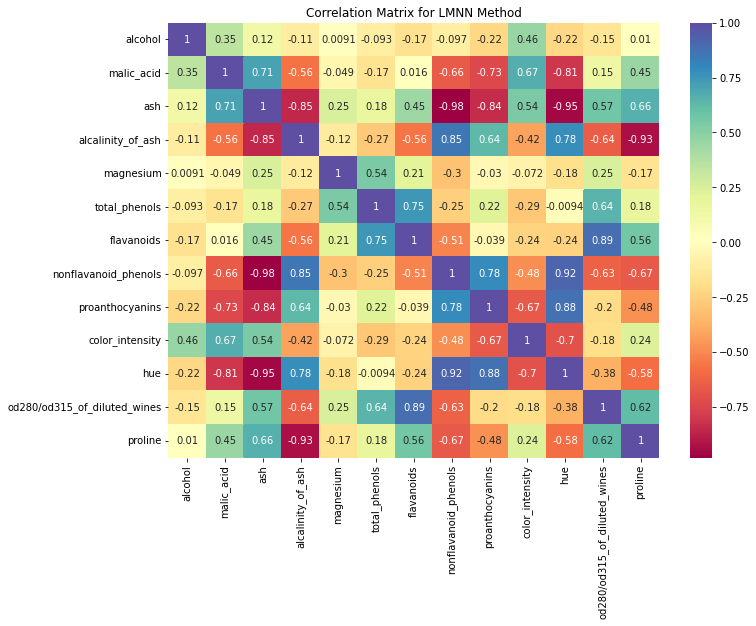

In [ ]:
# For LMNN method:
lmnn = LMNN(k = 15, learn_rate = 1e-6)
lmnn.fit(X, Y)
X_trans = lmnn.transform(X)

df = pd.DataFrame(data = X_trans, columns = data.feature_names)
corr_matrix = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr_matrix, cmap = 'Spectral', annot = True)
plt.title('Correlation Matrix for LMNN Method')
plt.show()

/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


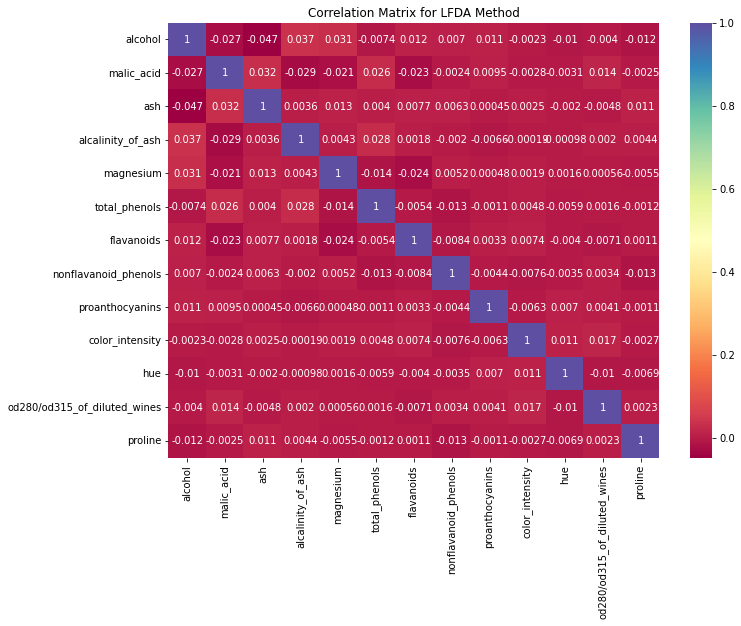

In [ ]:
# For LFDA method:
lfda = LFDA(k = 15)
lfda.fit(X, Y)
X_trans = lfda.transform(X)

df = pd.DataFrame(data = X_trans, columns = data.feature_names)
corr_matrix = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr_matrix, cmap = 'Spectral', annot = True)
plt.title('Correlation Matrix for LFDA Method')
plt.show()